In [1]:
from util import *
from generation import *
from swarm import *
from metrics import *
import random
import time
import copy
from IPython import display
import pylab as pl
from multiprocess.pool import ThreadPool


In [2]:
import yal

modules = yal.read('./yal_files/ami33.yal')

# modules = yal.read('./yal_files/ami49.yal')

participants = yal.util.as_participants(modules)

# For ami49 : Filter out Connection with zero emphasis

for participant in participants[:-1]:

    participant['connections'] = {x:y for x,y in participant['connections'].items() if y}

#participants

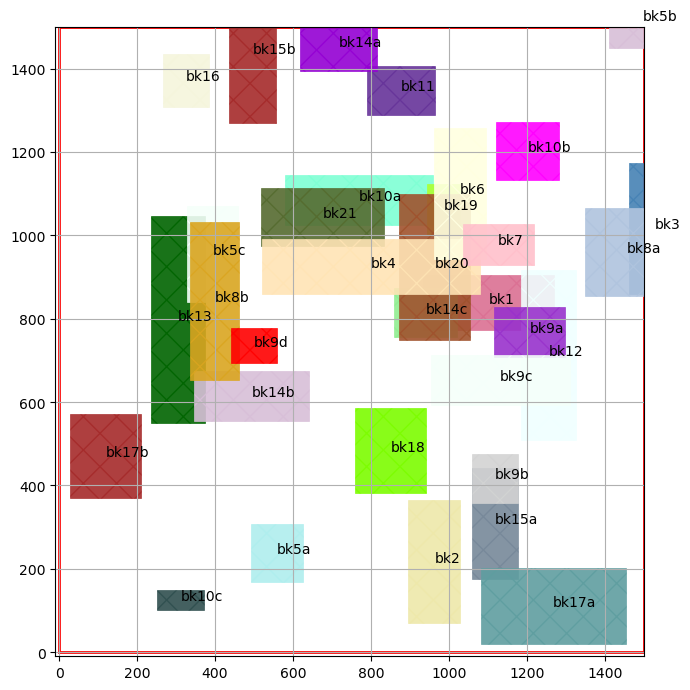

In [3]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 1500,     #8000
               "height" : 1500}     #8000

conciliation_quota  = 0.5

critical_amount     = 100

p   = random_place_mcnc(participants, layout_zone, 666)

a = plot_participants(layout_zone, p, 1500, 1500)

In [4]:
participants            = determine_initial_conditions(p, layout_zone, conciliation_quota, critical_amount)


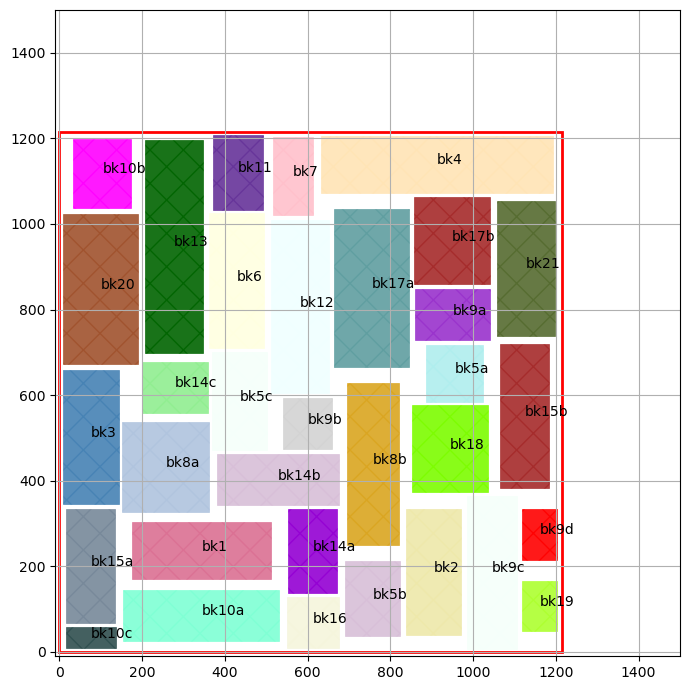

One Round of Interaction took: 6.611576080322266 seconds
Current deadspace : 21.661738556114415 %
31 rounds completed!


In [5]:
tic = time.time()


for i in range(500):

    participants, runtime    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, 1500, 1500)

    print('One Round of Interaction took: ' + str(runtime) + ' seconds')


    last_moves = {key : value['last-move'] for key,value in participants.items()}

    moves = list(last_moves.values())

    #print(last_moves)

    if moves.count('linger') == len(participants):

        ds = calculate_dead_space(participants, layout_zone)  

        print('Current deadspace : ' + str(ds) + ' %') 

        if ds < 25:
            break

        else:
            layout_zone         = scale_layout_zone(layout_zone, 0.9) 

            participants        = reset_after_tightening(participants)


toc = time.time()


print(str(i) + ' rounds completed!')


In [6]:
print('This took ' + str(toc-tic)  + ' seconds!')

This took 288.33141684532166 seconds!


In [7]:
# from position_export import *

# positions2csv(participants, layout_zone, 'ami33_floorplan.csv')